# Imporing libraries
In this section, we import the necessary libraries for our deep learning project, including TensorFlow, Matplotlib for visualization, and specific modules for working with the CIFAR-10 dataset and building a convolutional neural network (CNN).


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Loading Cifar10 dataset
We load the CIFAR-10 dataset using TensorFlow's built-in `cifar10` module. This dataset contains 60,000 32x32 color images in 10 different classes, with 6,000 images per class. We split the dataset into training and test sets.


In [2]:
cifar10_tf = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10_tf.load_data()

170498071/170498071 [==============================] - 14s 0us/step


# Class Names
We define the class names for the CIFAR-10 dataset, which include categories like 'airplane,' 'automobile,' 'bird,' 'cat,' and more. These class names will help us understand the labels in the dataset.


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [4]:
x_test.shape, len(x_train)

((10000, 32, 32, 3), 50000)

# Plotting one image
Here, we display a sample image from the dataset. We show the image, colorbar, and grid status, allowing us to visualize what the dataset images look like.


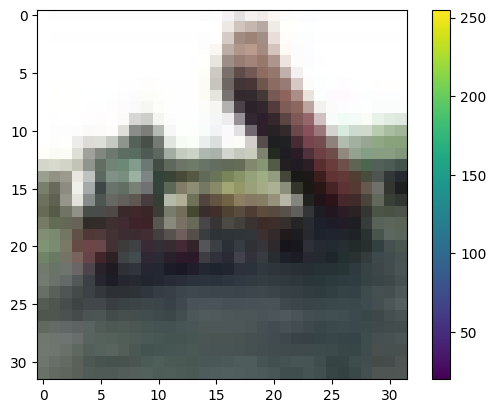

In [5]:
plt.figure()
plt.imshow(x_train[2])
plt.colorbar()
plt.grid(False)
plt.show()

# Plotting one image from each class
We display one image per class to get a visual representation of the different classes in the dataset. This helps us identify and verify the labels and understand the variety of images.


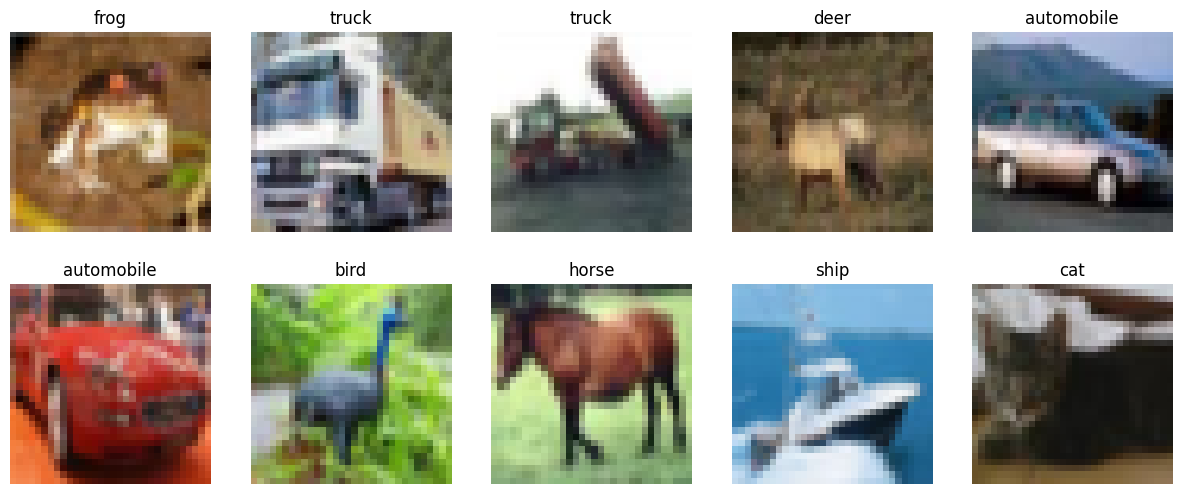

In [33]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i in range(10):
    image = x_train[i]
    label = np.argmax(y_train[i])

    # Get the class name from the class_names list
    class_name = class_names[label]

    axes[i].imshow(image)
    axes[i].set_title(class_name)  # Set the title to the class name
    axes[i].axis('off')

plt.show()


# Preprocessing images
In this section, we preprocess the images by scaling their pixel values to a range between 0 and 1. Additionally, we one-hot encode the class labels to prepare the data for training a neural network.


In [8]:
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# Building and compiling the model
We define and compile our convolutional neural network (CNN) model for image classification. The model architecture includes convolutional layers, batch normalization, max-pooling, dropout, and fully connected layers. We use the Adam optimizer and categorical cross-entropy loss for training.


In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Fitting the model
We train the model using data augmentation techniques such as rotation, width and height shifting, and horizontal flipping. This helps improve the model's generalization. We specify the batch size, number of epochs, and fit the model to the training data.


In [12]:
batch_size = 64
epochs = 50
steps_per_epoch = len(x_train) // batch_size

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/10
781/781 - 48s - loss: 1.6732 - accuracy: 0.4469 - val_loss: 1.3185 - val_accuracy: 0.5429 - 48s/epoch - 61ms/step
Epoch 2/10
781/781 - 36s - loss: 1.1333 - accuracy: 0.5996 - val_loss: 1.1548 - val_accuracy: 0.6234 - 36s/epoch - 46ms/step
Epoch 3/10
781/781 - 33s - loss: 0.9521 - accuracy: 0.6664 - val_loss: 0.8661 - val_accuracy: 0.7073 - 33s/epoch - 42ms/step
Epoch 4/10
781/781 - 32s - loss: 0.8553 - accuracy: 0.7000 - val_loss: 0.9049 - val_accuracy: 0.6898 - 32s/epoch - 41ms/step
Epoch 5/10
781/781 - 33s - loss: 0.7935 - accuracy: 0.7200 - val_loss: 1.3622 - val_accuracy: 0.5808 - 33s/epoch - 42ms/step
Epoch 6/10
781/781 - 32s - loss: 0.7449 - accuracy: 0.7418 - val_loss: 0.6810 - val_accuracy: 0.7722 - 32s/epoch - 41ms/step
Epoch 7/10
781/781 - 32s - loss: 0.6996 - accuracy: 0.7575 - val_loss: 0.6433 - val_accuracy: 0.7857 - 32s/epoch - 41ms/step
Epoch 8/10
781/781 - 33s - loss: 0.6706 - accuracy: 0.7667 - val_loss: 0.6403 - val_accuracy: 0.7814 - 33s/epoch - 42ms/step


# Evaluating Model and Displaying Predictions
After training the model, we evaluate its performance on the test dataset. We calculate the test accuracy to measure how well the model generalizes to unseen data. We also display predictions, including a bar chart showing the predicted label probabilities for a sample image, and a confusion matrix to understand the model's classification performance.


In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc*100:.2f}%")

313/313 - 1s - loss: 0.5975 - accuracy: 0.8007 - 1s/epoch - 4ms/step
Test accuracy: 80.07%


In [14]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [15]:
predictions = probability_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [16]:
predicted_labels = np.argmax(predictions, axis=1)

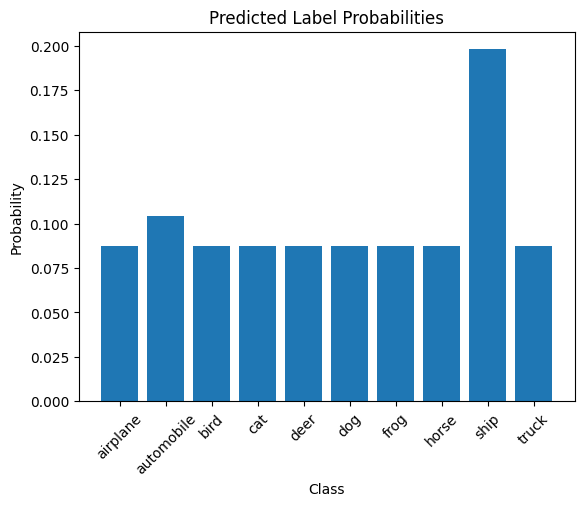

In [31]:
import matplotlib.pyplot as plt

# Get the predicted label probabilities for the first test sample
predicted_probabilities = predictions[2]

# Create a bar chart to visualize the probabilities
plt.figure()
plt.bar(class_names, predicted_probabilities)
plt.xlabel('Class')
plt.ylabel('Probability')
plt.title('Predicted Label Probabilities')
plt.xticks(rotation=45)
plt.show()


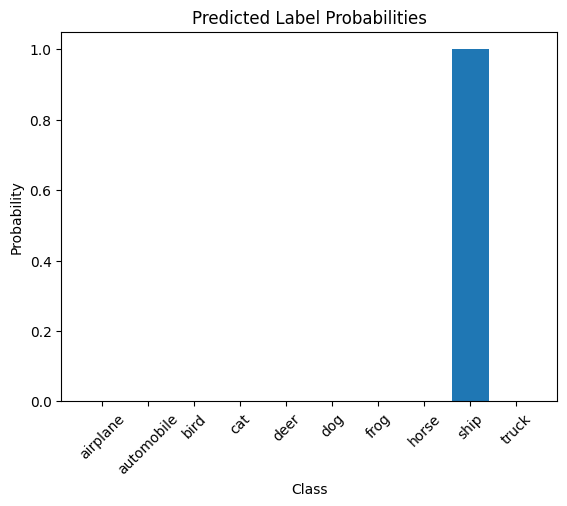

In [34]:
# Get the predicted label probabilities for the first test sample
predicted_probabilities = y_test[2]

# Create a bar chart to visualize the probabilities
plt.figure()
plt.bar(class_names, predicted_probabilities)
plt.xlabel('Class')
plt.ylabel('Probability')
plt.title('Predicted Label Probabilities')
plt.xticks(rotation=45)
plt.show()


# Confusion matrix

In [19]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred,axis = 1)
y_true = np.argmax(y_test,axis = 1)
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

313/313 [==============================] - 1s 3ms/step


[[Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')],
 [Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')]]

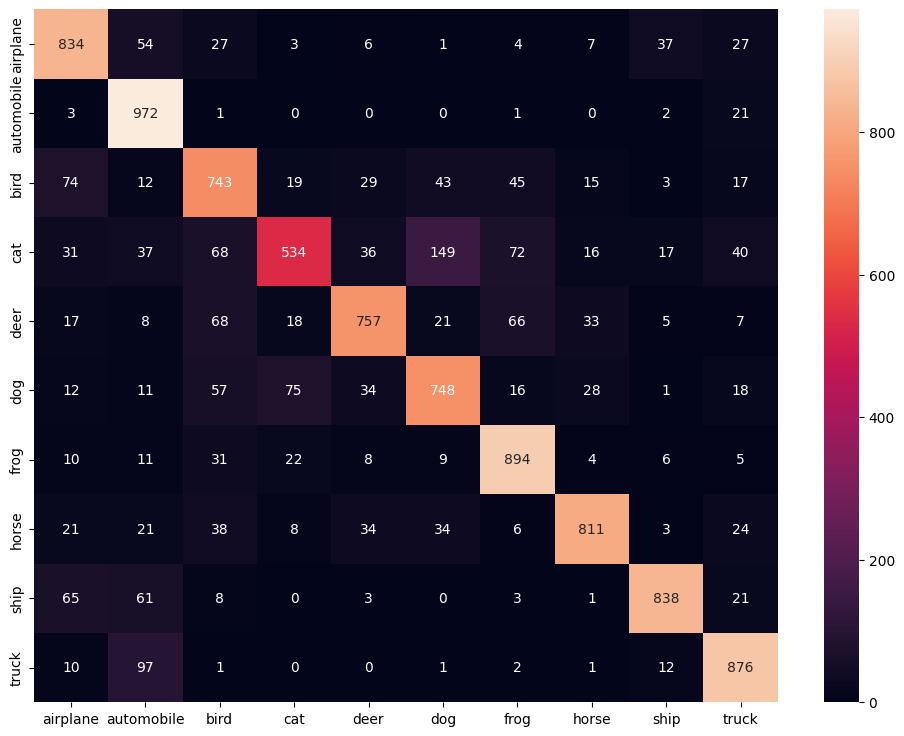

In [20]:
import seaborn as sns

plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=class_names, yticklabels=class_names)

# Accuracy and Loss Visualization
We plot the training and validation accuracy over epochs to visualize how the model's performance changes during training. This helps us monitor for overfitting or underfitting.


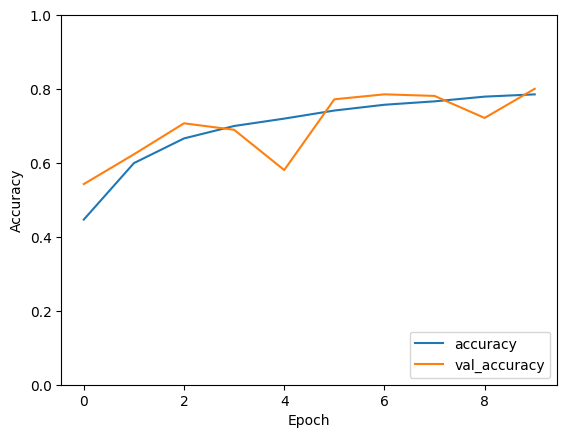

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

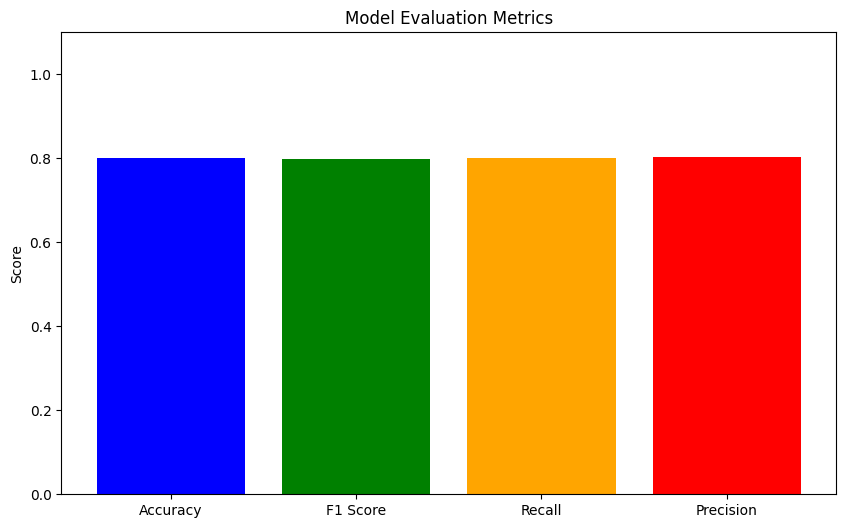

In [36]:
# Create a bar chart to display accuracy, F1 score, recall, and precision
metrics = ['Accuracy', 'F1 Score', 'Recall', 'Precision']
values = [accuracy, f1, recall, precision]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1.1)  # Set the y-axis limit to accommodate the scores
plt.show()
